In [249]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
#df.to_csv('./car_data.csv', index = False)
df = pd.read_csv('./data/car_data.csv')

### Contents:
- [Preprocessing](#Preprocessing)
- [Train Test Split](#Train-Test-Split)
- [Baseline Model](#Baseline-Model)
- [Linear Regression](#Linear-Regression)
- [Ridge](#Ridge)
- [Lasso](#Lasso)
- [Decision Tree](#Decision-Tree)
- [Random Forest](#Random-Forest)
- [Extra Trees](#Extra-Trees)
- [Gradient Boost](#Gradient-Boost)
- [Model Selection](#Model-Selection)
- [Model Evaluation](#Model-Evaluation)
- [Interpretable Model/Model Coefficients](#Interpretable-Model/Model-Coefficients)
- [Modeling Assumptions](#Modeling-Assumptions)
- [Conclusion](#Conclusion)
- [Recommendations](#Recommendations)
- [Sources](#Sources)

In [257]:
df = pd.get_dummies(data = df, columns=['vehicleType',
                                       'gearbox',
                                       'fuelType',
                                       'brand',
                                       'notRepairedDamage',
                                        'model'
                                       ], drop_first = True )

In [260]:
X = df.drop(columns = ['dateCrawled', 'name', 'seller','abtest', 'offerType', 'price','lastSeen',
                       'dateCreated', 'price_ln', 'Ad_Duration'], axis = 1)
y = df['price']

## Train Test Split

In [502]:
#Train/Test split reduced due to hardware limitations, data still includes over 150,000 car listings 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                y,random_state = 15, test_size = 0.15, train_size = .35)

In [26]:
#X_train, X_test, y_train, y_test = train_test_split(X,
                                                  #y, random_state = 42)

We perfom a train/test split on the dataset. We split our data into two pieces:

"A Training Set": The subset of the data on which we fit our model.

"A Testing Set": The subset of the data on which we evaluate the quality of our predictions.

In [ ]:

def rmse(y_true, y_pred): # this signature matters for later use with `make_scorer`
    '''Returns the root mean squared error'''
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
# cross_val score
cross_val_score(lr, X, y, cv = 5, scoring = make_scorer(rmse)).mean()

## Baseline Model

In [496]:
y_train_baseline = [y_train.mean() for i in y_train]
y_test_baseline = [y_train.mean() for i in y_test]

In [499]:
print('Training Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_train, y_train_baseline))))
print('Testing Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_test, y_test_baseline))))

Training Root Mean Squared Error: 4501.074859962035
Testing Root Mean Squared Error: 4499.088239500674


A baseline model has been created using the mean sale prices of our target variable price. This model provides a useful point of comparison for all future models used. Once we start getting results from other models our baseline can tell us if a change is adding value or if we need to include different features. If the model achieves a a score that is above the baseline prediction we will know something is wrong and that this model may not be appropriate for our problem. The baseline model is a critical component of our modeling process. We will be using the metric RMSE to score our models performance. The RMSE of our baseline model in 4501.07. 

## Linear Regression

In [503]:
model = LinearRegression()

In [504]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [505]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

In [513]:
print('Training Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_train, y_train_preds))))
print('Testing Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_test, y_test_preds))))
print(f'Cross Validation Score:',cross_val_score(model, X_train, y_train, cv=5).mean())

Training Root Mean Squared Error: 2762.888358238805
Testing Root Mean Squared Error: 2784.5658121175466
Cross Validation Score: 0.6204564361740528


The Multiple Linear Regression Model perfoms better than the baseline model which had an RMSE score of 4501.07. However, the scores of this model are poor. The RMSE score is 2638.03 on the training data. With the average price of a car being 4,878.12 this is a considerable amount to be off by. The model seems to suffer from high bias, it is failing to capture the underlying trend in the data. A positive aspect of these scores is is shows that this model is not overfit. An overfit model performs well on the data it is trained on but generalize poorly to any new data. The testing and training scores are very close which means that we have a low amount of variance in our model.  This is the first model we will be using and hopefully the scores will improve from here. 

## Ridge

In [423]:
#create variable for Sklearn StandardScaler to be used in Ridge and Lasso Models 
ss = StandardScaler()

ss.fit(X_train)

X_train_sc = ss.transform(X_train)

X_test_sc = ss.transform(X_test)

In [424]:
r_alphas = np.logspace(0, 5, 100)

In [425]:
ridge_cv = RidgeCV(alphas = r_alphas, cv =5)

In [426]:
ridge_cv.fit(X_train_sc, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [427]:
ridge_cv.alpha_

58.570208180566674

In [428]:
y_train_pred = ridge_cv.predict(X_train_sc)
y_test_pred = ridge_cv.predict(X_test_sc)

In [519]:
print('Training Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Testing Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_test, y_test_pred))))

Training Root Mean Squared Error: 2762.9812154001747
Testing Root Mean Squared Error: 2784.5498354538618


In [432]:
cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()

0.6204744496722724

Ridge Regression is A variation of linear regression with L2 regularization. Regularization adds penalty for higher terms in the model and thus controls the model complexity. If a regularization term is added, the model tries to minimize both loss and complexity of model. Limiting the complexity prevents the model from overfitting. Ridge model shrinks our regression coefficients clsoer to zero to make our model simpler. We are accepting more bias in exchange for a decrease in variance. We observe a slightly lower training score in comparison to our Linear Regression model but a higher testing score. This is surprising as we would expect to see an improvement in the fitness of our model. We can infer from the scores so far that the model is having a difficulty making accurate predictions on the target variable price. There may be too many features that are not linearly realted which are adding noise to the model making it difficult to learn. 

## Lasso

In [433]:
l_alphas = np.logspace(-3, 0, 100)

In [434]:
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)

In [435]:
lasso_cv.fit(X_train_sc, y_train);

In [436]:
y_train_pred_lasso = lasso_cv.predict(X_train_sc)
y_test_pred_lasso = lasso_cv.predict(X_test_sc)

In [534]:
print('Training Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))))
print('Testing Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))))

Training Root Mean Squared Error: 2762.9674175406235
Testing Root Mean Squared Error: 2784.551617375429


In [440]:
cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()

0.6202554041471185

Lasso is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the model. It uses shrinkage wherw data values are shrunk towards a central point, like the mean. We observe almost identical scores as the ridge regression model. The lasso model does not perform well with so many features in our model. If we were to reduce these features after assessing the strongest coefficeints the model may perform better. 

## Decision Tree

In [295]:
d_tree = DecisionTreeRegressor(min_samples_split=3, 
                                    min_samples_leaf=5,
                                    max_depth=10,
                                    random_state=42)

In [296]:
d_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [297]:
y_pred_dtree=d_tree.predict(X_test)
y_train_pred_dtree = d_tree.predict(X_train)

In [536]:
print('Training Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_train, y_train_pred_dtree))))
print('Testing Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_test, y_pred_dtree))))

Training Root Mean Squared Error: 1909.7438314677613
Testing Root Mean Squared Error: 2035.8740106480905


In [299]:
print('Mean Absolute Error:',(mean_absolute_error(y_test, y_pred_dtree)))
print('Mean Squared Error:', (mean_squared_error(y_test, y_pred_dtree)))
print('Testing Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_test, y_pred_dtree))))

Mean Absolute Error: 1352.4310613593614
Mean Squared Error: 4144782.9872323414
Root Mean Squared Error: 2035.8740106480905


0.8199812425058975
0.7952362213540953


In [300]:
cross_val_score(d_tree, X_train, y_train, cv=5).mean()

0.7900692324608982

The first of the tree based models will will use is the decision tree model. The decision tree builds regression models in the form of a tree structure. It breaks down the dataset into smaller and smaller subsets while at the same time an assocaited decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. The decision tree model perfomed better than all of the linear regression models, achieving a training score below RMSE 2,000 at 1909.74. The testing score was RMSE 2035.87 which tell us this model is somewhat overfit. We anticipate using a Random Forest model will reduce the variance and improve the RMSE scores.

## Random Forest

In [301]:
rfr = RandomForestRegressor(max_depth = 15, n_estimators=50, random_state=42)

In [302]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [303]:
y_pred_rfr = rfr.predict(X_test)
y_train_pred_rfr = rfr.predict(X_train)

In [539]:
print('Training Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_train, y_train_pred_rfr))))
print('Testing Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_test, y_pred_rfr))))

Training Root Mean Squared Error: 1274.4691008458135
Testing Root Mean Squared Error: 1710.2113328919386


In [307]:
cross_val_score(rfr, X_train, y_train, cv=5).mean()

0.8495789348687668

### Random Forest w/ Grid Search

In [464]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [15, 20, None],
    'max_features': [10, 15],
    'min_samples_leaf': [5, 6],
    'min_samples_split': [10],
    'n_estimators': [50, 100,]
}
    
grid_search = GridSearchCV(rfr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 25.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=15,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1

In [465]:
grid_search.best_params_
# used a reduce X sample size to identify the best hyperparameters for gridsearch

{'bootstrap': True,
 'max_depth': None,
 'max_features': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 50}

In [466]:
y_pred_gs = grid_search.predict(X_test)
y_train_pred_gs = grid_search.predict(X_train)

In [543]:
print('Training Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_train, y_train_pred_gs))))
print('Testing Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_test, y_pred_gs))))

Training Root Mean Squared Error: 2040.8327900926452
Testing Root Mean Squared Error: 2123.744571446518


In [313]:
cross_val_score(grid_search, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 19.2min finished


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 17.3min finished


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 17.4min finished


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 19.5min finished


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 18.4min finished


0.771908053926772

Random forest is an ensemble of randomized regression trees. Random Forests correct for decision trees' habit of overfitting to their training data. We took two approaches with the Random Forest model, first we ran the model without a grid search and then added a gridsearch in an attempt to identify the best hyperparameters. The Random Forest Regressor performed better without a gridsearch which is odd because the gridsearch should identify the best hyperparameters to include in a random forest regressor. The RMSE training score from the random forest regressor w/out a gridsearch was RMSE 1274.46 the testing score was RMSE 1710.21. This model has scored the best so far however it is clear by the difference in training and testing scores that the model suffers from high variance. It is overfit and which is indicative of poor model. The next step is to use an Extra Trees model to help reduce the high variance and hopefull improve the score. 

## Extra Trees

In [314]:
etr = ExtraTreesRegressor(n_estimators = 100, random_state = 42 )

In [315]:
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [316]:
y_train_pred_etr = etr.predict(X_train)
y_pred_etr = etr.predict(X_test)

In [546]:
print('Training Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_train, y_train_pred_etr))))
print('Testing Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_test, y_pred_etr))))

Training Root Mean Squared Error: 26.939766747651895
Testing Root Mean Squared Error: 1615.3596093308909


In [325]:
cross_val_score(etr, X_train, y_train, cv=5).mean()

0.8652767950384721

When using an Extra Trees model we observe an extremely low training score. This may be due to the models sensitivity to the train test split. This is unfortunate because we observe one of our best testing scores with this model. Unfortunately, this model will be excluded from the model selection process because it's providing a score that is not reliable. It is difficult to believe that we would observe such an improvement in our training score with this model. It would also be considered extremely overfit. Additonal research will be required to understand the low training score. 

## Gradient Boost

In [320]:
params = {'n_estimators': 200, 'max_depth': 5,
          'learning_rate': 0.02, 'loss': 'ls'}

#gbr = GradientBoostingRegressor(random_state = 42)
gbr = GradientBoostingRegressor(**params)

#Train the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [548]:
print('Training Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_train, y_preds_train_gbr))))
print('Testing Root Mean Squared Error:',(np.sqrt(mean_squared_error(y_test, y_preds_gbr))))

Training Root Mean Squared Error: 1871.8699933930377
Testing Root Mean Squared Error: 1882.5082445235591


In [326]:
cross_val_score(gbr, X_train, y_train, cv=5).mean()

0.82189570864305

Gradient Boosting Regressor: An ensemble method that combines many decision trees using boosting. Gradient boost achieved the second best RMSE scores (training: 1871.87, testing: 1882.51). It also is our best fit model with very little difference between training and testing scores. This model did not perform as well as the random forest model but is in consideration for the model we will select. 

## Model Selection

Two models were in consdieration for model selection. The Random Forest model and the Gradient Boost model. The Random Forest model had a RMSE training score of 1274.47 and a testing score of 1710.21. The Gradient Boost model had a training score of 1223.34 and a testing score of 1343.34. The Random Forest had better scores overall but the difference between the training and the testing score shows that the model was overfit. This high amount of variance is problematic as this model may not peform well on other data sets. The Gradient Boost was the second best perfomer score wise but it was much better fit. We have more confidence in this model if it was used with new data. 

## Model Evaluation

#### Addtional Metrics

##### Training Scores

|Model|MAE Score|MSE Score|RMSE Score|R^2 Score|
|:---|---|:---|:---|:---|
|Linar Regression|1988.967|7633552.080|2762.888|0.621|
|Ridge|1988.987|7634065.197|2762.98|0.623 |
|Lasso|1988.86|7634196.473|2763.00|0.623 | 
|Decision Tree|1288.828|3647121.502|1909.744|0.820|
|Random Forest|891.785|1624271.489|1274.469|0.920|
|Extra Trees*|1.51|725.75|1615.35|0.999|
|Gradient Boost|1262.11|3503897.27|1871.87|0.825| 

*scores for extra trees were extremely low in relation to training score and all other models. This model will not be in consideration during model selection. 

##### Testing Scores

|Model|Training RMSE Score|Testing RMSE Score|
|:---|:---|:---|
|Linar Regression|1983.582|7753806.762|
|Ridge|1983.578|7753717.786|
|Lasso|1983.579|7753727.709|
|Decision Tree|1352.431|4144782.987|
|Random Forest|1108.258|2924822.803|
|Extra Trees*|984.296|2609386.667|
|Gradient Boost|1264.153|3543837.29|

### Linear Regression

In [524]:
print('Training Mean Absolute Error:',(mean_absolute_error(y_train, y_train_preds)))
print('Training Mean Squared Error:', (mean_squared_error(y_train, y_train_preds)))
print('Training R^2:', (model.score(X_train, y_train)))

Training Mean Absolute Error: 1988.9674850856813
Training Mean Squared Error: 7633552.080091519
Training R^2: 0.6232144829736564


In [525]:
print('Testing Mean Absolute Error:',(mean_absolute_error(y_test, y_test_preds)))
print('Testing Mean Squared Error:', (mean_squared_error(y_test, y_test_preds)))
print('Testing R^2:', (model.score(X_train, y_train)))

Testing Mean Absolute Error: 1983.5823570888845
Testing Mean Squared Error: 7753806.762013853
Testing R^2: 0.6232144829736564


### Ridge 

In [526]:
print('Training Mean Absolute Error:',(mean_absolute_error(y_train, y_train_pred)))
print('Training Mean Squared Error:', (mean_squared_error(y_train, y_train_pred)))
print('Training R^2:', (ridge_cv.score(X_train_sc, y_train)))

Training Mean Absolute Error: 1988.9874304678965
Training Mean Squared Error: 7634065.196654228
Training R^2: 0.6231891559846812


In [527]:
print('Testing Mean Absolute Error:',(mean_absolute_error(y_test, y_test_pred)))
print('Testing Mean Squared Error:', (mean_squared_error(y_test, y_test_pred)))
print('Testing R^2:', (ridge_cv.score(X_test_sc, y_test)))

Testing Mean Absolute Error: 1983.5779917433333
Testing Mean Squared Error: 7753717.7861261275
Testing R^2: 0.616944829842271


### Lasso

In [531]:
print('Training Mean Absolute Error:',(mean_absolute_error(y_train, y_train_pred_lasso)))
print('Training Mean Squared Error:', (mean_squared_error(y_train, y_train_pred_lasso)))
print('Training R^2:',(lasso_cv.score(X_train_sc, y_train)))

Training Mean Absolute Error: 1989.0449355544727
Training Mean Squared Error: 7633988.950391102
Training R^2: 0.6231929194341699


In [533]:
print('Testing Mean Absolute Error:',(mean_absolute_error(y_test, y_test_pred_lasso)))
print('Testing Mean Squared Error:', (mean_squared_error(y_test, y_test_pred_lasso)))
print('Testing R^2:',(lasso_cv.score(X_test_sc, y_test)))

Testing Mean Absolute Error: 1983.5785033808163
Testing Mean Squared Error: 7753727.709828119
Testing R^2: 0.6169443395838607


### Decision Tree

In [535]:
print('Training Mean Absolute Error:',(mean_absolute_error(y_train, y_train_pred_dtree)))
print('Training Mean Squared Error:', (mean_squared_error(y_train, y_train_pred_dtree)))
print('Training R^2:',(d_tree.score(X_train, y_train)))

Training Mean Absolute Error: 1288.827828095027
Training Mean Squared Error: 3647121.501829165
Training R^2: 0.8199812425058975


In [537]:
print('Testing Mean Absolute Error:',(mean_absolute_error(y_test, y_pred_dtree)))
print('Testing Mean Squared Error:', (mean_squared_error(y_test, y_pred_dtree)))
print('Testing R^2:', (d_tree.score(X_test, y_test)))

Testing Mean Absolute Error: 1352.4310613593614
Testing Mean Squared Error: 4144782.9872323414
Testing R^2: 0.7952362213540953


### Random Forest

In [538]:
print('Training Mean Absolute Error:',(mean_absolute_error(y_train, y_train_pred_rfr)))
print('Training Mean Squared Error:', (mean_squared_error(y_train, y_train_pred_rfr)))
print('Training R^2:', rfr.score(X_train, y_train))

Training Mean Absolute Error: 891.7850883556738
Training Mean Squared Error: 1624271.4890107363
Training R^2: 0.9198273665579391


In [540]:
print('Testing Mean Absolute Error:',(mean_absolute_error(y_test, y_pred_rfr)))
print('Testing Mean Squared Error:', (mean_squared_error(y_test, y_pred_rfr)))
print('Testing R^2:', rfr.score(X_test, y_test))

Testing Mean Absolute Error: 1108.2586062719702
Testing Mean Squared Error: 2924822.803152021
Testing R^2: 0.8555056390435953


### Random Forest w/ Gridsearch

In [541]:
print('TrainingMean Absolute Error:',(mean_absolute_error(y_train, y_train_pred_gs)))
print('TrainingMean Squared Error:', (mean_squared_error(y_train, y_train_pred_gs)))
print('Training R^2:', grid_search.score(X_train, y_train))

TrainingMean Absolute Error: 1400.787031768783
TrainingMean Squared Error: 4164998.4771173303
Training R^2: 0.7944192836900417


In [542]:
print('Testing Mean Absolute Error:',(mean_absolute_error(y_test, y_pred_gs)))
print('Testing Mean Squared Error:', (mean_squared_error(y_test, y_pred_gs)))
print('Testing R^2:', grid_search.score(X_test, y_test))

Testing Mean Absolute Error: 1453.7233496905837
Testing Mean Squared Error: 4510291.004748554
Testing R^2: 0.7771791112418069


### Extra Tress

In [544]:
print('Training Mean Absolute Error:',(mean_absolute_error(y_train, y_train_pred_etr)))
print('Training Mean Squared Error:', (mean_squared_error(y_train, y_train_pred_etr)))
print('Training R^2:', etr.score(X_train, y_train))

Training Mean Absolute Error: 1.5178258995710048
Training Mean Squared Error: 725.7510324178907
Training R^2: 0.9999641775578245


In [545]:
print('Testing Mean Absolute Error:',(mean_absolute_error(y_test, y_pred_etr)))
print('Testing Mean Squared Error:', (mean_squared_error(y_test, y_pred_etr)))
print('Testing R^2:', etr.score(X_train, y_train))

Testing Mean Absolute Error: 984.2957957014505
Testing Mean Squared Error: 2609386.6674576486
Testing R^2: 0.9999641775578245


### Gradient Boost

In [556]:
print('Training Mean Absolute Error:',(mean_absolute_error(y_train, y_preds_train_gbr)))
print('Training Mean Squared Error:', (mean_squared_error(y_train, y_preds_train_gbr)))
print('Training R^2:', (gbr.score(X_train, y_train)))

Mean Absolute Error: 1262.1091780485233
Mean Squared Error: 3503897.272165251
Training R^2: 0.8270506663938093


In [558]:
print('Testing Mean Absolute Error:',(mean_absolute_error(y_test, y_preds_gbr)))
print('Testing Mean Squared Error:', (mean_squared_error(y_test, y_preds_gbr)))
print('Testing R^2:', (gbr.score(X_test, y_test)))
print('Testing R^2:', (gbr.score(X_test, y_test)))

Testing Mean Absolute Error: 1264.1534378210729
Testing Mean Squared Error: 3543837.2906991728
Testing R^2: 0.8249246059962292


Additional metrics that are used to evaluate the performance of models were generated in the model evaluation section to help evaluate the performance of the models. These metrics include Mean Absolute Error, Mean Squared Error and R^2

## Model Evaluation

The best performing model was Gradient Boost with a an RMSE training score of 1871.87 and a testing score of 1882.508. This model performed better than our baseline score of 4501.07 but overall performed poorly. The mean price of a car in our data set was 4,812 and we have an RMSE score of (1824.57). The RMSE score represents the value in Euros our average prediction is off by. It is a considerable amount off from the true price of the car and cannot be considered as a model that would be used for realworld application. The scores were not close to our target of a RMSE score within 10% of the mean value (4,812) of cars in the dataset. All models seemed to suffer from high bias and all of the Linear Regression models had poor cross validation scores averaging in the low 60% range.  

The tree based models all performed better than Linear Regression Models. The received better scores across the board on all metrics (see table above) and their cross validation scores were considerably better than the Linear Regression models. This is most likely due to the fact that Tree based models are able to discover more complex dependencies at the cost of more time for fitting. The Linear Regression models struggled becuase only a few features had a strong linear realtionship with the target variable price. The tree based models tend to handle large numbers of features better which is what our model dealt with once we one hot encoded model, brand, and vehicle types. This increased our feature size to over 300. Linear Regression needs regularization to avoid overfitting but even with this we did not observe an increase in performance. Linear Regression models may have perfomed better with a reduction in features only focusing on a small number of variables with strong linear realtionships to price. 


There were limited features that actual had any sizeable feature importance to our target variable. The additional features outside of age, kilometers, KwPower and a handful of car brands introduced a large amount of noise into the model and it made it difficult for the model to train. Also the range in prices of the same make and model cars made it more challenging for the model to learn. Car prices for each model seemed to range from slightly less than their retail price all the way down to a few thousand Euro or less. With such great variance in price for a smiliar brand and model our model has a difficult time making accurate price predictions. 

Using the best model Gradient Boost we created a scatter plot of the predicted prices vs. the actual prices. 

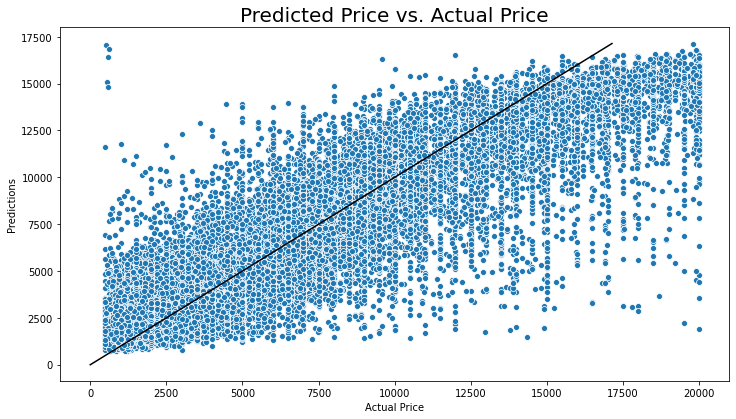

In [444]:
plt.figure(figsize=(12,6.5))
sns.scatterplot(y_test, y_preds_gbr)
plt.title('Predicted Price vs. Actual Price', size = 20)
plt.xlabel('Actual Price')
plt.ylabel('Predictions')
plt.savefig('a.png')
plt.plot([0, np.max(y_preds_gbr)],
         [0, np.max(y_preds_gbr)],
         color = 'black');

It is hard to tell because there a high volumne of plots in above scatterplot but we can say with confidence that we observe heteroscedasticity. These plots do not have a similar scatter and from lowest to highest price we observe predictions that are extremely far off from the actual price. We also observe a fan out effect of our plots especially as the true values increase in price. As price increases we observe many predictions that are making predictions that are much lower than the actual price of the car. We can see from this plot that the model struggled to make accurate predictions as the actual price of the car increased, prediciting much lower prices than the true price of the cars. 


In [337]:
df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_preds_gbr})
data = df.head(20)

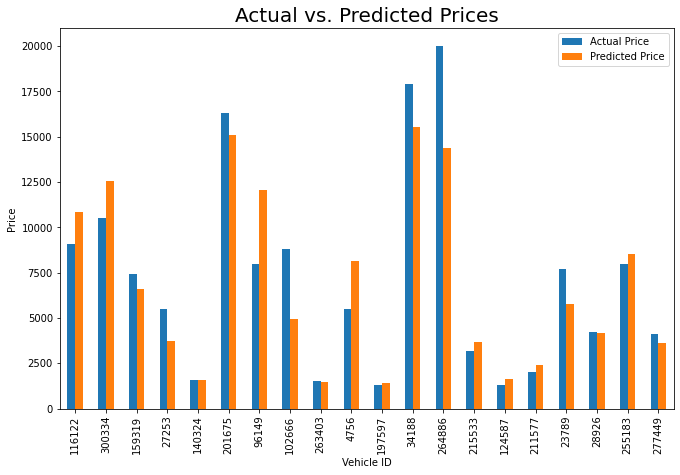

In [482]:
data.plot(kind='bar',figsize=(11,7))
plt.xlabel('Vehicle ID')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices', size = 20)
plt.show();

We took a sample of twenty predictions to continue the analysis of our models predictions. What we can tell from the above chart is when the true price of the car was low, somewhere in the 1,000 - 2,500 range the model made more accurate predictions. As the true prices of the cars increased the difference in (ytrue - yhat) began to increase. 

### Feature Importance

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature. Feature selection methods can give you useful information on the relative importance or relevance of features for a given problem. You can use this information to create filtered versions of your dataset and increase the accuracy of your models.

In [452]:
f_importance = gbr.feature_importances_

f_list=X_train.columns

df_feature_importance=pd.DataFrame(f_importance,columns=['importance'],index=f_list).sort_values(['importance'],ascending=False)

In [ ]:
f_list=X.columns
df_gbr = pd.DataFrame(f_importance,index=f_list,columns=['importance']).sort_values(['importance'],ascending=False)
df_gbr.head(10)

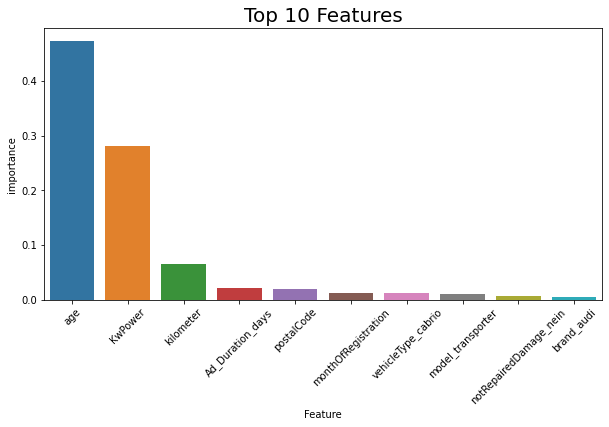

In [469]:
#plot the feature importance
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(top10_features.index,top10_features['importance'],data=top10_features)
plt.xlabel('Feature')
plt.title('Top 10 Features', size = 20)
plt.xticks(rotation=45);

Analyzing the features with the highest coefficients to price we observe the two features we hypothesized while doing our EDA in the top three. This comes as no surprise as intuition tells us that age and kilometers driven are the most important features when evaluating the re-sale value of a used car. Age seemed to be the most important factor. This is likely due to the fact that even if the odometer is realatively low on ab old car it just has had more time to wear. More things like rust, worn interior, outdated parts that may be hard to find are all contributing factors to price. Kilometers driven goes hand in hand with this, as mentioned in EDA there is a linear relation between these two variables. The older the car the higher the number on the odometer. 

The fact that Kilowatts is the second most important feature was somewhat surprising. At first it didn't make sense but after further research we learned that higher Kilowatts usually correlates to larger engine size. Engines being arguably the most important component of an automobile it is logical to assume that the larger the engine the higher the price of a car would be. Large powerful engines are also usually associated with luxury automobiles. 

## Interpretable Model/Model Coefficients

Additionally we wanted to analyze an interpretable model to gain a better understaning of the most important features when predicting price. Here we are able to intepret the models coefficients. Our best performing Linear Regression model was the Ridge model.

In [455]:
coef_df = pd.DataFrame({'name':X.columns, 'coeff':ridge.coef_})
coef_df.sort_values(by='coeff', ascending = False)

,name,coeff
19,brand_audi,816.061108
20,brand_bmw,801.832930
38,brand_mercedes_benz,605.892132
6,vehicleType_cabrio,593.438520
99,model_andere,558.917061
...,...,...
43,brand_peugeot,-372.453491
12,gearbox_manuell,-485.014825
50,brand_smart,-501.214751
4,age,-1404.348441


In regression with multiple independent variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant.

A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

When analyzing the coefficients of a higest correlated features we see age has a coefficent of -1,404.34. This can be interpreted by saying, as the age of a car increases by one unit (one year), then we expect the price of the car to decrease by €1,402.35 all else being equal. Now logically this does not make sense as if a car had a true value of € 5,000 in four years the car would be worth a negative amount. This is the weight our model is putting on this feature. We see here that this feature has a strong correlation to price and greatly affects the models prediction of a cars price. 

For the positve coefficeints we observe the top five are categorical variables. This could be interpreted as "if the car is a Audi it will have an €816.06 increase in our y variable (price). 

In [367]:
def plot_coef(model, top_n = 10):
    cols = X_train.columns
    coef = ridge.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

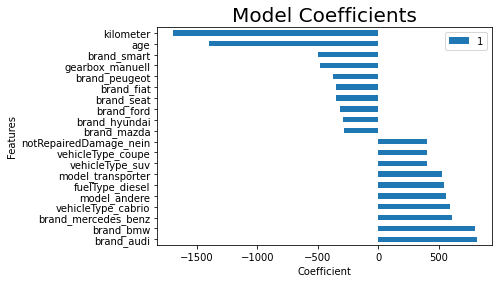

In [491]:

plot_coef(ridge)
plt.title('Model Coefficients', size = 20)
plt.xlabel('Coefficient')
plt.ylabel('Features');

The most valuable features are brands of vehicles. If a car in the dataset is an Audi, BMW, or Merceds-Benz it has the greatest impact increasing the prediction. This is to be expected as all three of these brands are considered luxury automobiles and we would intuitively think these brand of cars would be more expensive. 

Kilometer and age of a car have the greatest negative affect on the price of car. This is to be expected and something we predicted during the EDA stage of this project. However, the weight of the coefficients greatly affects the predictions of our model. Older cars with more miles will have very low price predictions even if there true value isn't as low. 

When using a multiple linear regression model there are inherent assumptions that are associated with it. The features of the data and the target variable being linearly realted being one assumption. Even though our model perfomed poorly we can say that this linear relationship has not been violated. We observe features that are correlated to the price and we are able to measure that with our coefficients. This supports the idea that a cars features are directly related to the price of a car.

The idea that feature variables are independent of one another is another assumption of regression models. When looking at the coeffcients and correlations them we cannot say with confidence that the variables are independent of one another. Looking at age and kilometers we see a strong correlation between the two. This is to be expected as a car is unlikely to have low mileage if it is old. This was analyzed during the EDA process and we observed a linear relationship between the two variables.

### Modeling Assumptions

Multiple linear regression models have a handful of associated assumptions. Linear relationships between the features and the target variable are one of these assumptions. We can say with some confidence that this assumption was not violated as we observe linear relationships with most of our variables. The one issue being the model feature that was one hot encoded and certain models did not show a linear relationship. However we did see a linear relationship with other models and brands so this was probably due to models occuring infrequently in the dataset. 

Additionally independence of variables in another assumption associated with MLR models. This means that feature variables are not associated with one another. We cannot say that this assumption wasn't violated as we observed a strong correlation between age and kilometers driven as was to expected. 

#### Residuals Distribution 

In [484]:
residuals = y_test - y_test_pred

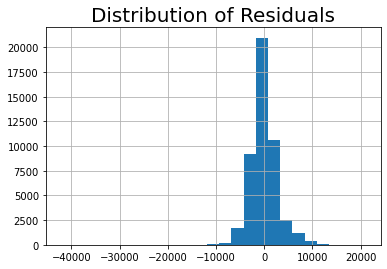

In [485]:
# x & y labels
plt.title("Distribution of Residuals", fontsize = 20)
residuals.hist(bins = 25);

The histogram above shows the distribution of residuals being right skewed. However, it does seem so show approximate normality otherwise. 

The assumption here is that residuals are normally distrubted around 0, have constant variance and are indpendent. We can say with some confidence that this assumption has not been violated. 

## Conclusion

Ones intuition regarding the sale price of a used car was reinforced through our predictions. We were able to identify age of a vehicle and the distance that it has been driven as being the most important factors related to the resale value of a car. Kilowatts the european equivalent of horsepower was also one of the highest coefficients related to our target variable. We can infer from this that it is probably due to the size of the engine which is one of the most important components of an automobile. However, this may come as no surprise as the average person would probably assume engine size/power is an important factor in the price of a car. The reality of our predictive model demonstrates that cars have many nuanced features that affect the resale value of a car. The information that was provided in our dataset was not enough to make accurate predicitons even with what we would consider the most important features of a car. Also, a lot of noise was introduced with the model and brands of the cars for sale. A BMW 5 series had a mean price of 7,000 Euros but the prices ranged from just below 60,000 Euro down to 1,000 Euro. Based off of this information the model of the car introduces a lot of additional noise that may make it more challenging for the model to learn from. We observed this with the majority of makes and models with prices ranging from just below retail value to junk status. 

Based on our models performance it would not be effective in assisting buyers and sellers who are looking for additional appraisals on pre-owned vehicles. The predictions were too far off the acutal price for this to be an effective model. The best RMSE score was 1,274 (random forest model), which is approximately 20% of the mean value of the prices of cars in our dataset. If this model was put into use buyers and sellers would run the risk of overpaying or selling below the fair market value by a considerable amount. Straight line depreciation is most likely the industry standard becuase it provides a catch all solution to pricing pre-owned vehicles. No advanced analysis is required and prices can be set with consistency. The fact that a car is a depreciating asset is a challenging asset in predicting its price. Besides miles driven and age cars experience a lot of wear and tear and some owners maintain their cars well and others don't, but this is an extremely nuanced variable that is difficult to quantify. Used cars prices are also subject to market fluctuations and negotiations. If someone really needs cash they may be willing to part with their car for a thousand or more less. The combination of these variables show how difficult it is to predict the re-sale price of a car. 

The majority of features in the dataset did not have a strong linear relationship with our target variable of sales price. This most likey introduced a considerable amount of noise into our model and is a key contributing factor into our models poor performance. Additional outside research shows that many used car buyers want to know "how the car runs". How the car runs is a variable that is made up with a number of factors and is extremely difficult to quantify and introduce as a feature into our model. Cars are complex pieces of machinary that have so many components, it is very difficult to take a handful of features and make an accurate prediction of that cars value. 


## Recommendations

The model feature should have been divided up in to subgroups. BMW could have had different three different tiers of cars based off of mean price. One hot encoding the feature model created a considerable amount of noise in the model. When analyzing the feature importance of the model we selected (Gradient Boost) many scores were 0.0, which means it had no importance relative to our target variable. Intuitively we think certain models are associated with certain prices so initially it made sense to include this in our features. However, if there was a small number of certain models it provided no benefit. 

We believe if we had focused on a specific type of vehicle brand our predictions could have been more accurate. The most popular make in our dataset was Volkswagen. If we only tried to predict Volkswagen prices there would have been less noise from other makes and models of cars. This then could have been used on other brands and could be used by buyers and sellers of those specific types of vehicles. This could then be more focused on specific vehicle types to get more accurate predictions. We would only take Volkswagen sedans into our model and exclude the other vehicle types like SUVs or vans. This would take a more targeted approach for the buyer or the seller, narrowing down the data to their specifications of used car they are looking to buy or sell.  

The minimum price of vehicles introduced in our dataset could be increased. The floor was set too low which allowed for the inclusion of many cars that could be considered "junk status" and are purchased for parts or scrap. These cars did not represent vehicles someone would be looking to purchase as their primary use of transportation. These low prices represent cars at the end of their lifecycle or could have been in a major accident, requiring a lot of repairs. These types of vehicles should be excluded and more additional research should be completed to set the minimum sale price for cars that should be included in our data. 

Industry standards for appraising the value of vehicles rely on comparable sales prices of similar makes and models. If we could introduce comprable sale prices in some way this could improve the accuracy of our predictions. This would be challenging to do but this is an important variable in used car prices. Date ranges would have to be included to assess the current market demand for certain makes and models 





### Sources

Consumer Reports, May,2014, www.consumerreports.org/cro/2012/12/how-much-is-the-used-car-really-worth/

Nerd Wallet, Jeanne Lee Oct,2015, www.nerdwallet.com/blog/loans/dealers-set-car-prices/

InCharge Debt Solutions, Sept,2017, www.incharge.org/understanding-debt/auto/the-truth-about-used-car-prices/